# Feature Engineering

Feature Engineering is a term that covers the various operations that are performed on the features (variables) to make them fit for different learning algorithms.

In this tutorial, we will explore the following aspects of Feature engineering

- Feature Transformation
- Feature Construction
- Feature Reduction

## Feature Transformation

Features are transformed by replacing the observations of the feature by a function. Sometimes the datasets are not normally distributed and in such circumstances, for the normal functioning of various statistical and other machine learning algorithms,  feature transformation is performed to normalize the data. The common application of them is when dealing with predictive models such as Linear Regression where we need to normalize the data if the data is otherwise.

In [1]:
import pandas as pd
import numpy as np
import matplotlib 
%matplotlib inline
import sklearn as sk

#### Data

This dataset has a numerical variable ‘Sales_in_thousands

In [3]:
CarData = pd.read_csv("C:/Users/HP PC/Documents/10 Academy/Jully_Training/Week3/car_sales.csv")

In [4]:
CarData.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


### Skewness of the data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002428C32A308>]],
      dtype=object)

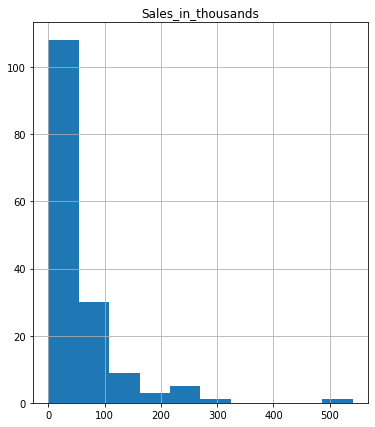

In [6]:
CarData.hist(column="Sales_in_thousands",figsize=(6,7))

In [7]:
CarData['Sales_in_thousands'].skew()

3.408518366470572

We find that the skewness comes out to be 3.408518366470572 which indicates that the data is heavily positively (Right) Skewed and is far away from 0 (Normal). 

We can now apply various transformation and see how it affects the skewness of the data.

### Log Transformation

Log Transformation takes the natural logarithm of the variable which helps in making the distribution normal. Here we perform Log transformation on the variable ‘Sales_in_thousands’ to reduce skewness and normalize the data

In [8]:
CarData['log_Sales_in_thousands']=np.log(CarData['Sales_in_thousands'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002428C3A6A48>]],
      dtype=object)

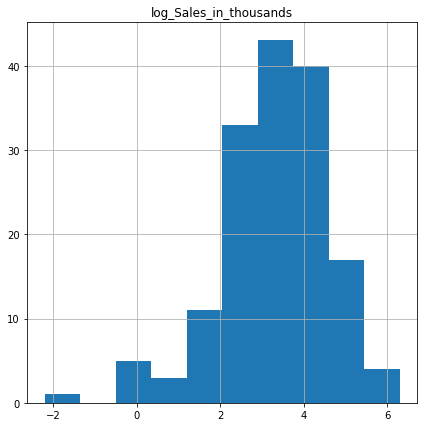

In [9]:
CarData.hist(column="log_Sales_in_thousands",figsize=(7,7))

The distribution certainly now appears to be much more normal. Thus skewness of the distribution can be curbed by the use of log transformation.

In [10]:
CarData['log_Sales_in_thousands'].skew()

-0.820575891707341

### Square-Root Transformation

Another popular method of transformation is Square root transformation which helps in normalizing the data.

In [11]:
CarData['sqrttransform']=np.sqrt(CarData['Sales_in_thousands'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002428C41D208>]],
      dtype=object)

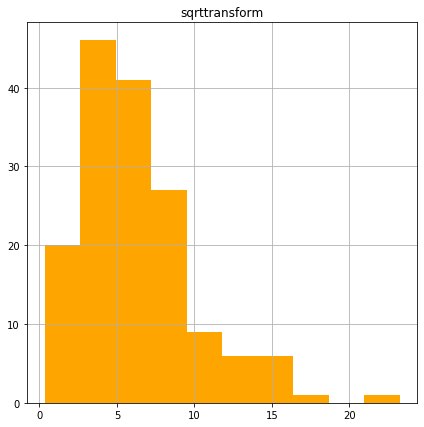

In [12]:
CarData.hist(column="sqrttransform",figsize=(7,7),color='orange')

In [13]:
CarData['sqrttransform'].skew()

1.2700354413822215

### Feature Scaling

It is always a good idea to scale numerical descriptive features before fitting any models, as scaling is mandatory for some important class of models such as nearest neighbors, SVMs, and deep learning. Three popular types of scaling are as follows: There are mainly two ways of performing Scaling on features-

- **Min Max Scaler**: Each descriptive feature is scaled to be between 0 and 1.
- **Standardization**: Scaling of each descriptive feature is done via standardization. That is, each value of the descriptive feature is scaled by removing the mean and dividing by the standard deviation of that feature. This ensures that, after scaling, each descriptive feature has a 0 mean and 1 standard deviation.

In [33]:
from sklearn import preprocessing

x = np.arange(10).reshape(-1, 1)
x = np.vstack((x, 100.0))

min_max = preprocessing.MinMaxScaler().fit_transform(x).ravel()
standard = preprocessing.StandardScaler().fit_transform(x).ravel()

x_scaled_df = pd.DataFrame({'x': x.ravel(), 'min_max': min_max, 'standard': standard})
x_scaled_df.round(2)

,x,min_max,standard
0,0.0,0.00,-0.48
1,1.0,0.01,-0.44
2,2.0,0.02,-0.41
3,3.0,0.03,-0.37
4,4.0,0.04,-0.33
5,5.0,0.05,-0.30
6,6.0,0.06,-0.26
7,7.0,0.07,-0.22
8,8.0,0.08,-0.19
9,9.0,0.09,-0.15


## Feature Construction

It is a process of creating features based on the original descriptors. This helps in building more efficient features for building predictive models. There are two main methods of Feature Construction: Binning and Encoding.

In [2]:
HeightData = pd.read_csv("C:/Users/HP PC/Documents/10 Academy/Jully_Training/Week3/height.csv")

In [3]:
HeightData.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


### Binning

This method is used to create bins for continuous variables where continuous variables are converted to categorical variables.

In [4]:
HeightData['Bins'] = pd.cut(HeightData['Height'],4)
HeightData

,Gender,Height,Weight,Index,Bins
0,Male,174,96,4,"(169.5, 184.25]"
1,Male,189,87,2,"(184.25, 199.0]"
2,Female,185,110,4,"(184.25, 199.0]"
3,Female,195,104,3,"(184.25, 199.0]"
4,Male,149,61,3,"(139.941, 154.75]"
...,...,...,...,...,...
495,Female,150,153,5,"(139.941, 154.75]"
496,Female,184,121,4,"(169.5, 184.25]"
497,Female,141,136,5,"(139.941, 154.75]"
498,Male,150,95,5,"(139.941, 154.75]"


# Feature reduction

Here we will explore the most important method of Feature reduction/ extraction which is Principal Component Analysis and will use this method to reduce the features and use the output in modeling. 

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA

#### Boston housing data

In [40]:
HouseData = pd.read_csv("C:/Users/HP PC/Documents/10 Academy/Jully_Training/Week3/HousingData.csv")

In [42]:
HouseData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [41]:
HouseData = HouseData.dropna()

#### Removing Response  variable

In [43]:
HouseData2 = HouseData[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']]
HouseData2.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21


#### Scaling Features

Unlike R, there is no inbuilt option PCA command to scale the dataset. Therefore, we will have to first scale the dataset to perform PCA in Python.

In [44]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_data = scale.fit_transform(HouseData2)
scaled_data

array([[-0.40081837,  0.27334191, -1.25962   , ..., -1.49630294,
         0.43074011, -1.06712587],
       [-0.39853454, -0.47905119, -0.56972405, ..., -0.3408793 ,
         0.43074011, -0.49719648],
       [-0.39853672, -0.47905119, -0.56972405, ..., -0.3408793 ,
         0.38509692, -1.19727801],
       ...,
       [-0.3965804 , -0.47905119,  0.13466553, ...,  1.13806296,
         0.43074011, -0.50541662],
       [-0.39489501, -0.47905119,  0.13466553, ...,  1.13806296,
         0.43074011, -0.97670438],
       [-0.38958205, -0.47905119,  0.13466553, ...,  1.13806296,
         0.39204993, -0.86162248]])

In [45]:
scaled_data = pd.DataFrame(scaled_data,columns=HouseData2.columns)
scaled_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.400818,0.273342,-1.259620,-0.271237,-0.134687,0.423161,-0.134014,0.135851,-0.974609,-0.656944,-1.496303,0.430740,-1.067126
1,-0.398535,-0.479051,-0.569724,-0.271237,-0.745475,0.202245,0.357849,0.554334,-0.858633,-0.978184,-0.340879,0.430740,-0.497196
2,-0.398537,-0.479051,-0.569724,-0.271237,-0.745475,1.298216,-0.281214,0.554334,-0.858633,-0.978184,-0.340879,0.385097,-1.197278
3,-0.397984,-0.479051,-1.278462,-0.271237,-0.842847,1.029962,-0.830521,1.076829,-0.742657,-1.097162,0.075073,0.405283,-1.346610
4,-0.398258,-0.479051,-1.278462,-0.271237,-0.842847,0.215156,-0.367380,1.076829,-0.742657,-1.097162,0.075073,0.399564,-1.035615


In [47]:
scaled_data = scaled_data.dropna()
scaled_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.400818,0.273342,-1.259620,-0.271237,-0.134687,0.423161,-0.134014,0.135851,-0.974609,-0.656944,-1.496303,0.430740,-1.067126
1,-0.398535,-0.479051,-0.569724,-0.271237,-0.745475,0.202245,0.357849,0.554334,-0.858633,-0.978184,-0.340879,0.430740,-0.497196
2,-0.398537,-0.479051,-0.569724,-0.271237,-0.745475,1.298216,-0.281214,0.554334,-0.858633,-0.978184,-0.340879,0.385097,-1.197278
3,-0.397984,-0.479051,-1.278462,-0.271237,-0.842847,1.029962,-0.830521,1.076829,-0.742657,-1.097162,0.075073,0.405283,-1.346610
4,-0.398258,-0.479051,-1.278462,-0.271237,-0.842847,0.215156,-0.367380,1.076829,-0.742657,-1.097162,0.075073,0.399564,-1.035615
...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,-0.382157,-0.479051,-0.189991,-0.271237,0.281356,-1.019964,0.163976,-0.670530,-0.394730,-0.091800,0.306158,0.418068,0.319337
390,-0.377092,-0.479051,-0.189991,-0.271237,0.281356,-0.362955,0.386570,-0.623629,-0.394730,-0.091800,0.306158,0.430740,0.213845
391,-0.396580,-0.479051,0.134666,-0.271237,0.175132,-0.229545,0.278863,-0.724158,-0.974609,-0.793769,1.138063,0.430740,-0.505417
392,-0.394895,-0.479051,0.134666,-0.271237,0.175132,0.998402,0.792268,-0.781413,-0.974609,-0.793769,1.138063,0.430740,-0.976704


#### Splitting the dataset into train and test

It is important to note at this point that PCA should not be made to run on the entire dataset and as this would cause the dataset to leak thus causing overfitting. Also, we should not perform PCA on train and test separately as the level of variance will be different in both these datasets which will the cause the final vectors of these two datasets to have different directions. So we have to first divide the dataset into train and test and perform PCA on train dataset and transform the test dataset using that PCA model (which was fitted on the train dataset).

In [48]:
from sklearn.model_selection import train_test_split
Y = HouseData['MEDV'].dropna()
X_train,X_test,Y_train,Y_test=train_test_split(scaled_data,Y,test_size=0.3,random_state=123)

#### Initialize and Fit PCA

We first initialize PCA for having 13 components (for 13 continuous variables in the dataset) and then we fit this model on the scaled features

In [49]:
pca = PCA(n_components=13)
pca_model = pca.fit(X_train)
pca_train = pca_model.transform(X_train)
pca_train

array([[-2.11711018,  0.48921133,  0.69123512, ...,  0.19625356,
        -0.7008392 ,  0.40583643],
       [ 3.46293991, -1.00720926,  1.28138245, ...,  0.1059726 ,
        -0.20626484,  0.0784237 ],
       [ 0.32424788,  0.0227345 , -1.79809126, ...,  0.04684144,
         0.30537989, -0.01975127],
       ...,
       [ 6.07409889, -2.81684627,  0.87106682, ...,  0.10347483,
         0.06508891, -0.06764359],
       [ 1.99646232,  0.64563446, -0.75416483, ..., -0.51550623,
        -0.14208573, -0.93740166],
       [ 1.86228524, -0.38501984,  0.37590997, ..., -0.50125546,
        -0.07378399,  0.19740421]])

#### Variance explained by each Principal Component

In [50]:
pca_model.explained_variance_

array([6.06516668, 1.38617773, 1.24944649, 0.86920327, 0.78643342,
       0.64023819, 0.51114295, 0.37729156, 0.29268838, 0.20936162,
       0.17708155, 0.15322843, 0.07092858])

### Ratio of Variance explained by each component

We can now look at the proportion of variance explained by each PC.

In [51]:
var = pca_model.explained_variance_ratio_
var

array([0.47427137, 0.10839346, 0.09770163, 0.06796816, 0.0614959 ,
       0.05006402, 0.0399693 , 0.02950267, 0.02288704, 0.01637123,
       0.01384706, 0.01198184, 0.00554633])

From the output we find that PC1 explains 47% of the variance, PC2 explains 11% and so on. We find that the first seven components explain approximately 90% of the variance (0.47818141+ 0.10745023 + 0.09150656+ 0.06383847 + 0.06069613+ 0.0528423 + 0.04414302 = 0.89865812).

#### PCA CHART


Text(0, 0.5, 'Cumulative Proportion of Variance Explained')

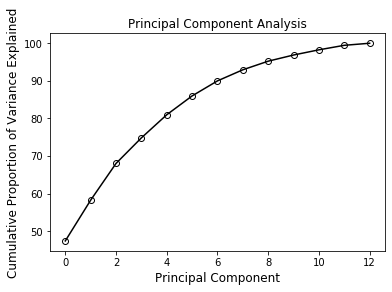

In [83]:
cumulative_var = np.cumsum(np.round(var, decimals=4)*100)
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)

#### Renaming Columns

For our ease and convenience, we will rename using PCA. After renaming, we will select 7 principal components and make a data frame with the dependent variable and the 7 PCs.

In [54]:
pca_train = pd.DataFrame(pca_train,columns=['PC_' + str(i) for i in range(1, 14)])
pca_train.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13
0,-2.117110,0.489211,0.691235,-0.145763,-0.727223,0.390836,0.787514,-1.149077,0.037610,0.130790,0.196254,-0.700839,0.405836
1,3.462940,-1.007209,1.281382,-0.492949,0.052714,1.387916,-1.354594,-0.284231,-0.588363,-0.391381,0.105973,-0.206265,0.078424
2,0.324248,0.022734,-1.798091,-0.034781,0.290177,0.234711,0.524733,-1.223630,-0.037954,0.240570,0.046841,0.305380,-0.019751
3,0.362140,-0.091797,-1.692573,-0.150380,0.383680,0.525867,0.336185,-1.000776,-0.027419,0.378794,0.108655,0.095653,-0.018746
4,-1.673462,-0.240224,-0.292487,0.042599,-0.205361,-0.175906,-0.555333,0.866700,0.952509,-0.257445,0.249753,-0.727528,0.532276


#### Concatenate Dependent variable and Principal Components


In [55]:
Y_train1 = Y_train.reset_index()

pca_train1 = pd.concat([pca_train,Y_train1],axis=1)
pca_train2 = pca_train1.drop(columns='index')
pca_train3 = pca_train1[['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7','MEDV']]
pca_train3

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,MEDV
0,-2.117110,0.489211,0.691235,-0.145763,-0.727223,0.390836,0.787514,33.4
1,3.462940,-1.007209,1.281382,-0.492949,0.052714,1.387916,-1.354594,11.0
2,0.324248,0.022734,-1.798091,-0.034781,0.290177,0.234711,0.524733,14.5
3,0.362140,-0.091797,-1.692573,-0.150380,0.383680,0.525867,0.336185,13.1
4,-1.673462,-0.240224,-0.292487,0.042599,-0.205361,-0.175906,-0.555333,25.0
...,...,...,...,...,...,...,...,...
270,-1.844828,0.279742,-0.157588,-0.351537,-0.160271,0.052882,-0.200812,27.1
271,-0.014029,0.883210,-0.353664,-0.388800,-0.366548,-0.002198,0.186021,18.5
272,6.074099,-2.816846,0.871067,-1.333418,2.850322,0.525459,1.379046,7.0
273,1.996462,0.645634,-0.754165,0.397712,-1.013768,-0.670233,-1.273295,20.1


### Creating Dataset having Principal Components

In [56]:
pca_train_X = pca_train3[['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7']]
pca_train_X.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7
0,-2.117110,0.489211,0.691235,-0.145763,-0.727223,0.390836,0.787514
1,3.462940,-1.007209,1.281382,-0.492949,0.052714,1.387916,-1.354594
2,0.324248,0.022734,-1.798091,-0.034781,0.290177,0.234711,0.524733
3,0.362140,-0.091797,-1.692573,-0.150380,0.383680,0.525867,0.336185
4,-1.673462,-0.240224,-0.292487,0.042599,-0.205361,-0.175906,-0.555333


### Transform features of Test Dataset into Principal Components

As mentioned earlier, we will transform the features of the test dataset into Principal Components using the PCA model created earlier.


In [57]:
pca_test = pca.transform(X_test)
pca_test

array([[-3.22449825,  1.99153412,  2.11691262, ..., -0.31161939,
         0.33641599,  0.10778922],
       [-0.33074951,  0.23568449, -1.25083449, ...,  0.06185363,
         0.17205933,  0.04986303],
       [-0.31687966,  2.59252339,  1.69641485, ..., -0.65428251,
         0.42369468,  0.02408261],
       ...,
       [-0.87279534,  2.41952747,  0.8976336 , ..., -0.39536593,
        -0.03170692,  0.01837249],
       [ 1.76203315,  0.72268283, -1.60362704, ...,  0.23464899,
        -0.22034201, -0.03673711],
       [-0.87471842,  0.549963  , -0.35244311, ..., -0.78341761,
         1.09809607,  0.12536758]])

We now convert the above output into a dataset and add the dependent variable to it so that we can predict values using the above created Linear Regression Model.

In [59]:
pca_test = pd.DataFrame(pca_test,columns=['PC_' + str(i) for i in range(1, 14)])
Y_test1 = Y_test.reset_index()
pca_test1 = pd.concat([pca_test,Y_test1],axis=1)
pca_test1 = pca_test1.drop(columns='index')
pca_test2 = pca_test1[['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7','MEDV']]
pca_test2.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,MEDV
0,-3.224498,1.991534,2.116913,2.181112,1.666554,0.848825,0.310243,46.0
1,-0.330750,0.235684,-1.250834,-0.379992,0.374841,-0.108104,0.137305,19.8
2,-0.316880,2.592523,1.696415,-0.976100,-1.354792,0.141031,-0.037403,50.0
3,-1.683220,1.406551,-0.032856,-0.548469,-0.681483,0.972044,1.171216,37.9
4,-0.124737,0.056632,-0.900425,-0.007795,-0.204131,0.011966,-0.026033,24.5
